# PCA(Principal Component Analysis)

In [145]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [146]:
data=pd.read_csv("Downloads/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [147]:
data.shape

(178, 14)

In [148]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [149]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [151]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [152]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [153]:
data.head(15)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [154]:
pd.set_option("display.max_rows",None)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [155]:
win=data.iloc[:,1:]

In [156]:
win.values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [157]:
Wine=win.values

In [158]:
Wine_norm=scale(Wine)

In [159]:
Wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [160]:
#TO apply the PCA method 
pca=PCA(n_components=13)
pca

PCA(n_components=13)

In [161]:
pca_values=pca.fit_transform(Wine_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [162]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [163]:
# to calculate the variance each of the PCA explain
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [164]:
#Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

Text(0.5, 1.0, 'Variance plot for PCA')

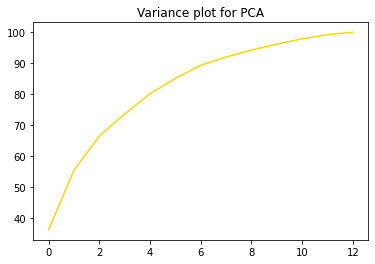

In [165]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="gold")
plt.title("Variance plot for PCA")

In [166]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

In [167]:
newdata=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['Pc1','Pc2','pc3']),data[['Type']]],axis=1)
newdata

,Pc1,Pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
5,3.050254,-2.122401,-0.629396,1
6,2.449090,-1.174850,-0.977095,1
7,2.059437,-1.608963,0.146282,1
8,2.510874,-0.918071,-1.770969,1
9,2.753628,-0.789438,-0.984247,1


In [168]:
#Importing libraries from SKLEARN
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [169]:
wine = datasets.load_wine()
wine
X=wine.data
Y=wine.target
target_names=wine.target_names

In [170]:
pca = PCA(n_components=13)
wine_X = pca.fit(X).transform(X)

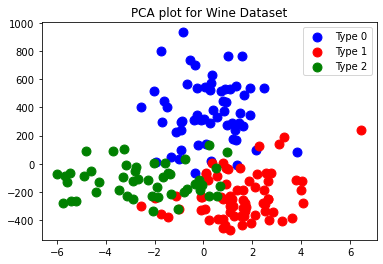

In [171]:
plt.scatter(wine_X[Y == 0, 3], wine_X[Y == 0, 0], s =80, c = 'blue', label = 'Type 0')
plt.scatter(wine_X[Y== 1, 3], wine_X[Y == 1, 0], s =80,  c = 'red', label = 'Type 1')
plt.scatter(wine_X[Y== 2, 3], wine_X[Y == 2, 0], s =80,  c = 'green', label = 'Type 2')
plt.title('PCA plot for Wine Dataset')
plt.legend()

# Hierarchical clustering

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp 

In [173]:
data=pd.read_csv("Downloads/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [174]:
data1=data.iloc[:,1:4]
data1

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
5,14.20,1.76,2.45
6,14.39,1.87,2.45
7,14.06,2.15,2.61
8,14.83,1.64,2.17
9,13.86,1.35,2.27


In [175]:
def norm_func(i):
    x=(i-i.min())/(i.min()-i.max())
    return x

In [176]:
df_norm=norm_func(data1)
df_norm

,Alcohol,Malic,Ash
0,-0.842105,-0.191700,-0.572193
1,-0.571053,-0.205534,-0.417112
2,-0.560526,-0.320158,-0.700535
3,-0.878947,-0.239130,-0.609626
4,-0.581579,-0.365613,-0.807487
5,-0.834211,-0.201581,-0.582888
6,-0.884211,-0.223320,-0.582888
7,-0.797368,-0.278656,-0.668449
8,-1.000000,-0.177866,-0.433155
9,-0.744737,-0.120553,-0.486631


In [177]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data_=pd.DataFrame(trans.fit_transform(data1))
data_

,0,1,2
0,0.842105,0.191700,0.572193
1,0.571053,0.205534,0.417112
2,0.560526,0.320158,0.700535
3,0.878947,0.239130,0.609626
4,0.581579,0.365613,0.807487
5,0.834211,0.201581,0.582888
6,0.884211,0.223320,0.582888
7,0.797368,0.278656,0.668449
8,1.000000,0.177866,0.433155
9,0.744737,0.120553,0.486631


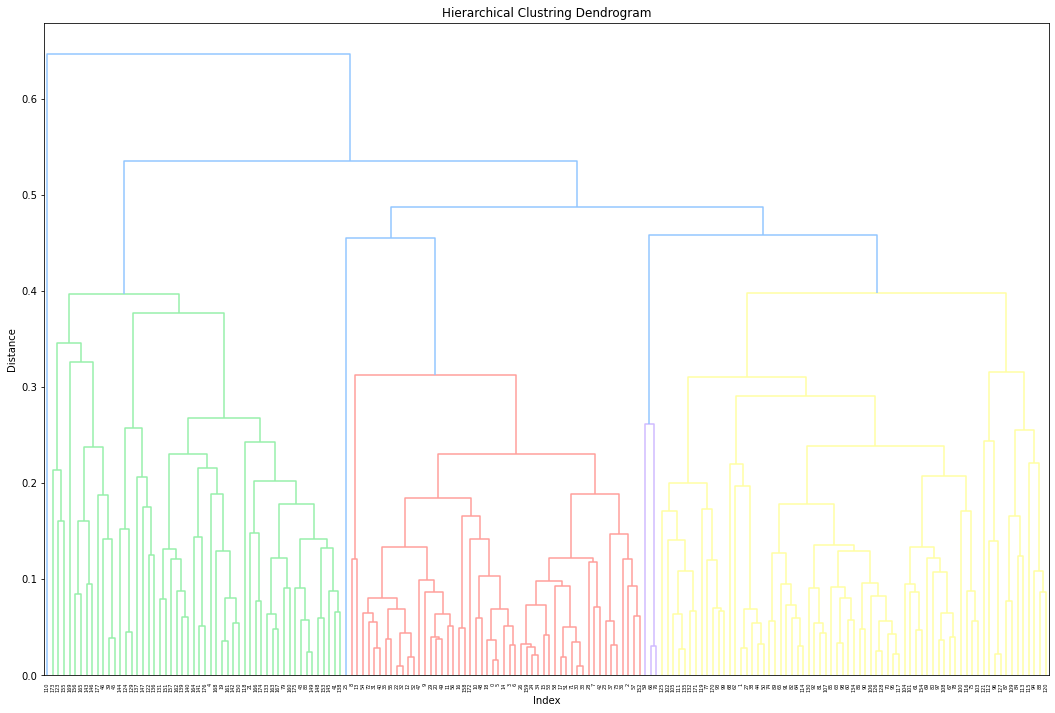

In [178]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
a=linkage(df_norm,method='average',metric='euclidean')
plt.figure(figsize=(18,12))
plt.title("Hierarchical Clustring Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(a,)
plt.show()

In [179]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean').fit(df_norm)
cluster_labels=pd.DataFrame(h_complete.labels_)
cluster_labels

,0
0,0
1,1
2,0
3,0
4,2
5,0
6,0
7,0
8,0
9,0


In [180]:
data_["cluster"]=cluster_labels
data_

,0,1,2,cluster
0,0.842105,0.191700,0.572193,0
1,0.571053,0.205534,0.417112,1
2,0.560526,0.320158,0.700535,0
3,0.878947,0.239130,0.609626,0
4,0.581579,0.365613,0.807487,2
5,0.834211,0.201581,0.582888,0
6,0.884211,0.223320,0.582888,0
7,0.797368,0.278656,0.668449,0
8,1.000000,0.177866,0.433155,0
9,0.744737,0.120553,0.486631,0


In [181]:
data_.iloc[:,:6].groupby(data_.cluster).mean()

,0,1,2,cluster
cluster,,,,
0,0.729096,0.203520,0.611845,0.0
1,0.329939,0.192759,0.476633,1.0
2,0.564626,0.602919,0.574558,2.0
3,0.113158,0.592885,0.245989,3.0
4,0.475439,0.041502,0.122995,4.0


In [182]:
data_[(data_.cluster==0)]

,0,1,2,cluster
0,0.842105,0.191700,0.572193,0
2,0.560526,0.320158,0.700535,0
3,0.878947,0.239130,0.609626,0
5,0.834211,0.201581,0.582888,0
6,0.884211,0.223320,0.582888,0
7,0.797368,0.278656,0.668449,0
8,1.000000,0.177866,0.433155,0
9,0.744737,0.120553,0.486631,0
10,0.807895,0.280632,0.502674,0
11,0.813158,0.146245,0.513369,0


In [183]:
data_[(data_.cluster==1)]

,0,1,2,cluster
1,0.571053,0.205534,0.417112,1
27,0.597368,0.193676,0.417112,1
38,0.536842,0.150198,0.395722,1
44,0.531579,0.203557,0.395722,1
50,0.531579,0.195652,0.363636,1
60,0.342105,0.071146,0.491979,1
61,0.423684,0.122530,0.352941,1
62,0.694737,0.100791,0.299465,1
63,0.352632,0.077075,0.427807,1
64,0.300000,0.140316,0.625668,1


In [184]:
data_[(data_.cluster==2)]

,0,1,2,cluster
4,0.581579,0.365613,0.807487,2
19,0.686842,0.466403,0.641711,2
21,0.500000,0.604743,0.689840,2
39,0.839474,0.642292,0.614973,2
41,0.626316,0.612648,0.406417,2
43,0.581579,0.640316,0.497326,2
45,0.836842,0.652174,0.577540,2
46,0.881579,0.563241,0.491979,2
79,0.439474,0.618577,0.556150,2
83,0.531579,0.616601,0.513369,2


In [185]:
data_[(data_.cluster==3)]

,0,1,2,cluster
110,0.113158,0.592885,0.245989,3


In [186]:
data_[(data_.cluster==4)]

,0,1,2,cluster
59,0.352632,0.039526,0.000000,4
66,0.547368,0.053360,0.181818,4
76,0.526316,0.031621,0.187166,4


In [187]:
data2=data.iloc[:,1:4]
data2

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
5,14.20,1.76,2.45
6,14.39,1.87,2.45
7,14.06,2.15,2.61
8,14.83,1.64,2.17
9,13.86,1.35,2.27


In [188]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
data_1=pd.DataFrame(Scalar.fit_transform(data2))
data_1

,0,1,2
0,1.518613,-0.562250,0.232053
1,0.246290,-0.499413,-0.827996
2,0.196879,0.021231,1.109334
3,1.691550,-0.346811,0.487926
4,0.295700,0.227694,1.840403
5,1.481555,-0.517367,0.305159
6,1.716255,-0.418624,0.305159
7,1.308617,-0.167278,0.890014
8,2.259772,-0.625086,-0.718336
9,1.061565,-0.885409,-0.352802


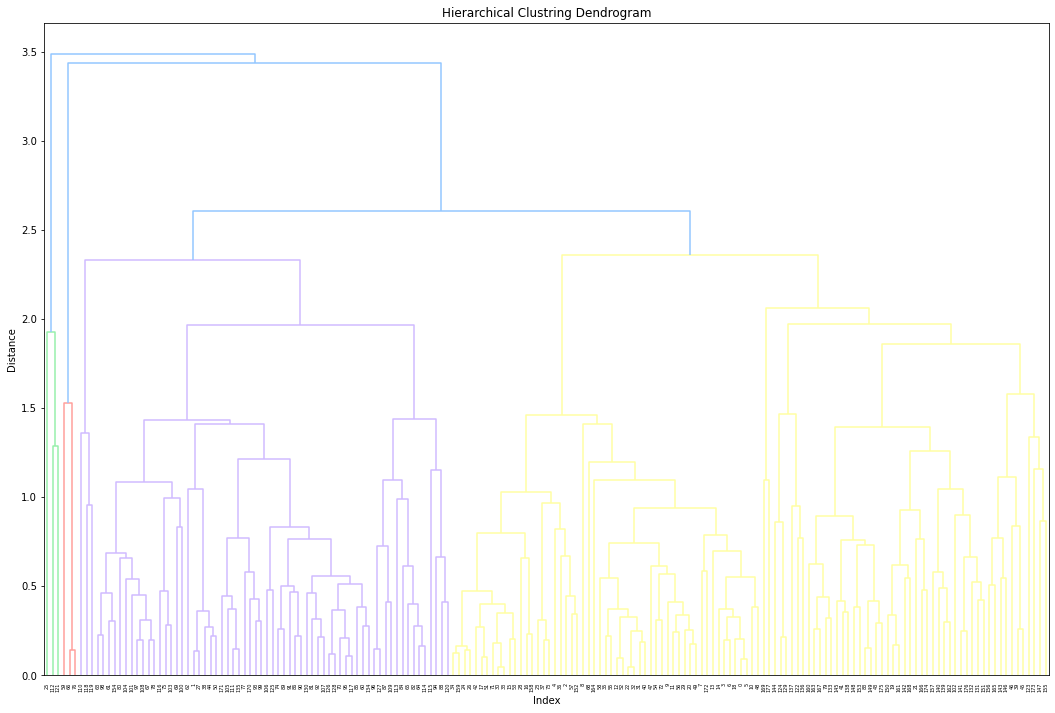

In [189]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
a=linkage(data_1,method='average',metric='euclidean')
plt.figure(figsize=(18,12))
plt.title("Hierarchical Clustring Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(a,)
plt.show()

In [190]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=6, linkage='average',affinity = "euclidean").fit(data_1) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0      4
1      1
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     0
20     4
21     0
22     4
23     4
24     4
25     3
26     4
27     1
28     4
29     4
30     4
31     4
32     4
33     4
34     4
35     4
36     4
37     4
38     1
39     0
40     4
41     0
42     4
43     0
44     1
45     0
46     0
47     4
48     4
49     4
50     1
51     4
52     4
53     4
54     4
55     4
56     4
57     4
58     4
59     2
60     1
61     1
62     1
63     1
64     1
65     1
66     2
67     1
68     4
69     1
70     1
71     4
72     4
73     4
74     1
75     1
76     2
77     1
78     1
79     0
80     1
81     1
82     1
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    0
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    5
1

In [191]:
data_1['clust']=cluster_labels # creating a  new column and assigning it to new column 
data_1

,0,1,2,clust
0,1.518613,-0.562250,0.232053,4
1,0.246290,-0.499413,-0.827996,1
2,0.196879,0.021231,1.109334,4
3,1.691550,-0.346811,0.487926,4
4,0.295700,0.227694,1.840403,4
5,1.481555,-0.517367,0.305159,4
6,1.716255,-0.418624,0.305159,4
7,1.308617,-0.167278,0.890014,4
8,2.259772,-0.625086,-0.718336,4
9,1.061565,-0.885409,-0.352802,4


In [192]:
data_1.iloc[:].groupby(data_1.clust).mean()

,0,1,2,clust
clust,,,,
0,0.180651,1.301545,0.258572,0.0
1,-0.887605,-0.608273,-0.529187,1.0
2,-0.202523,-1.244474,-2.838434,2.0
3,-1.083679,-0.068535,2.766422,3.0
4,0.981609,-0.497128,0.456690,4.0
5,-1.141325,1.074489,-1.583433,5.0


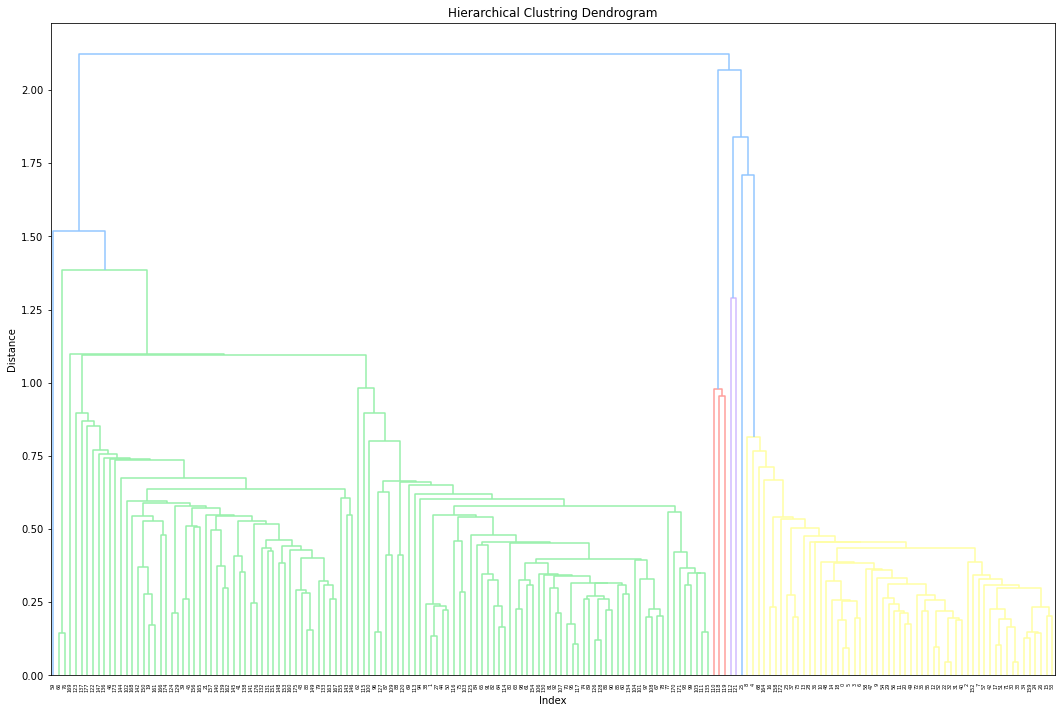

In [193]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
a=linkage(data_1,method='single',metric='euclidean')
plt.figure(figsize=(18,12))
plt.title("Hierarchical Clustring Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(a,)
plt.show()

In [194]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(data_1) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data_1['clust']=cluster_labels # creating a  new column and assigning it to new column 
data_1

,0,1,2,clust
0,1.518613,-0.562250,0.232053,4
1,0.246290,-0.499413,-0.827996,0
2,0.196879,0.021231,1.109334,4
3,1.691550,-0.346811,0.487926,4
4,0.295700,0.227694,1.840403,4
5,1.481555,-0.517367,0.305159,4
6,1.716255,-0.418624,0.305159,4
7,1.308617,-0.167278,0.890014,4
8,2.259772,-0.625086,-0.718336,4
9,1.061565,-0.885409,-0.352802,4


In [195]:
data_1.iloc[:].groupby(data_1.clust).mean()

,0,1,2,clust
clust,,,,
0,-0.404389,0.207899,-0.245016,0.0
1,-1.656018,0.025720,2.589747,1.0
2,-1.141325,1.074489,-1.583433,2.0
3,0.061000,-0.257044,3.119772,3.0
4,0.981609,-0.497128,0.456690,4.0


In [196]:
data_1[(data_1.clust==0)]

,0,1,2,clust
1,0.246290,-0.499413,-0.827996,0
19,0.789806,0.685502,0.707247,0
21,-0.087232,1.313866,1.036228,0
27,0.369816,-0.553273,-0.827996,0
38,0.085705,-0.750759,-0.974210,0
39,1.506260,1.484422,0.524480,0
41,0.505695,1.349773,-0.901103,0
43,0.295700,1.475446,-0.279695,0
44,0.061000,-0.508390,-0.974210,0
45,1.493907,1.529305,0.268606,0


In [197]:
data_1[(data_1.clust==1)]

,0,1,2,clust
112,-1.532492,0.308483,2.023170,1
121,-1.779545,-0.257044,3.156325,1


In [198]:
data_1[(data_1.clust==2)]

,0,1,2,clust
110,-1.903071,1.260006,-1.997705,2
118,-0.284874,0.981731,-1.412851,2
119,-1.236028,0.981731,-1.339744,2


In [199]:
data_1[(data_1.clust==3)]

,0,1,2,clust
25,0.061,-0.257044,3.119772,3


In [200]:
data_1[(data_1.clust==4)]

,0,1,2,clust
0,1.518613,-0.562250,0.232053,4
2,0.196879,0.021231,1.109334,4
3,1.691550,-0.346811,0.487926,4
4,0.295700,0.227694,1.840403,4
5,1.481555,-0.517367,0.305159,4
6,1.716255,-0.418624,0.305159,4
7,1.308617,-0.167278,0.890014,4
8,2.259772,-0.625086,-0.718336,4
9,1.061565,-0.885409,-0.352802,4
10,1.358028,-0.158301,-0.243142,4


# KMEANS CLUSTERING

In [201]:
#importing the libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [202]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X 

array([0.37993069, 0.63821386, 0.82439155, 0.6233943 , 0.6130684 ,
       0.08498464, 0.68428272, 0.15385889, 0.01127818, 0.40757216,
       0.10948792, 0.57702171, 0.72348156, 0.3915561 , 0.35615661,
       0.83345266, 0.74860537, 0.30193431, 0.32233964, 0.03783794,
       0.55444741, 0.53276604, 0.5712252 , 0.0657757 , 0.50350923,
       0.28183712, 0.1203137 , 0.8587684 , 0.22260492, 0.3044685 ,
       0.30573899, 0.10006236, 0.42012488, 0.50852938, 0.99480093,
       0.59653751, 0.24665649, 0.33761899, 0.78653033, 0.51537106,
       0.66671478, 0.96564603, 0.06885527, 0.13526015, 0.84760642,
       0.9814254 , 0.63021778, 0.87249377, 0.72949699, 0.55718694,
       0.50107363, 0.29631309, 0.41917881, 0.92095346, 0.07382355,
       0.83765437, 0.84259066, 0.12585394, 0.75632145, 0.77343044,
       0.2253872 , 0.28754367, 0.65383428, 0.46294907, 0.76552042,
       0.49312862, 0.63704145, 0.95379061, 0.96770518, 0.47173428,
       0.24589324, 0.91097045, 0.31602762, 0.16530662, 0.04572

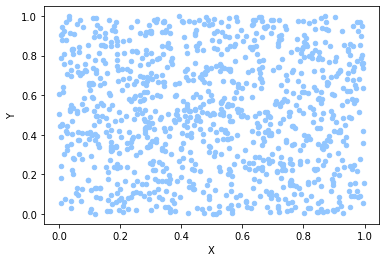

In [203]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

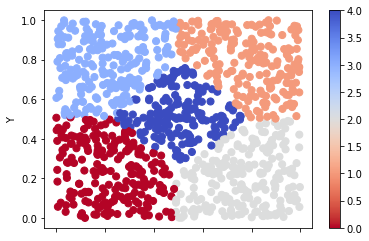

In [204]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

In [205]:
#Reading the dataset
data = pd.read_csv("Downloads/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [206]:
data_1=data.iloc[:,1:4]
data_1

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
5,14.20,1.76,2.45
6,14.39,1.87,2.45
7,14.06,2.15,2.61
8,14.83,1.64,2.17
9,13.86,1.35,2.27


In [207]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x) 
df_norm = norm_func(data_1.iloc[:])  
df_norm

,Alcohol,Malic,Ash
0,0.842105,0.191700,0.572193
1,0.571053,0.205534,0.417112
2,0.560526,0.320158,0.700535
3,0.878947,0.239130,0.609626
4,0.581579,0.365613,0.807487
5,0.834211,0.201581,0.582888
6,0.884211,0.223320,0.582888
7,0.797368,0.278656,0.668449
8,1.000000,0.177866,0.433155
9,0.744737,0.120553,0.486631


<function matplotlib.pyplot.show(close=None, block=None)>

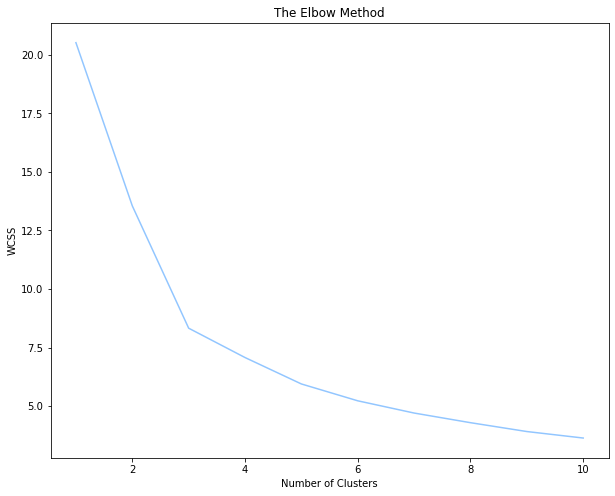

In [208]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show

In [209]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [210]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0,
       3, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 4,
       3, 3, 1, 3, 3, 1, 1, 1, 4, 3, 3, 2, 3, 2, 3, 3, 4, 0, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 2, 4, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 4,
       2, 2, 4, 4, 4, 4, 3, 3, 2, 2, 4, 4, 2, 0, 2, 3, 3, 4, 3, 2, 3, 2,
       2, 2, 3, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       3, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0,
       2, 0])

In [211]:
clf.cluster_centers_ 

array([[0.6422807 , 0.66515152, 0.56666667],
       [0.72137024, 0.2123143 , 0.61229947],
       [0.38324561, 0.49367589, 0.52709447],
       [0.3937247 , 0.13849194, 0.36706431],
       [0.20701754, 0.17504235, 0.62694169]])

In [212]:
clf.inertia_

5.947705194339894

In [213]:
md=pd.Series(y_kmeans)
#converting numpy array into pandas series object 
data_1['clust']=md # creating a  new column and assigning it to new column 
data_1

,Alcohol,Malic,Ash,clust
0,14.23,1.71,2.43,1
1,13.20,1.78,2.14,3
2,13.16,2.36,2.67,1
3,14.37,1.95,2.50,1
4,13.24,2.59,2.87,1
5,14.20,1.76,2.45,1
6,14.39,1.87,2.45,1
7,14.06,2.15,2.61,1
8,14.83,1.64,2.17,1
9,13.86,1.35,2.27,1


In [214]:
data_1.iloc[:].groupby(data_1.clust).mean() 

,Alcohol,Malic,Ash,clust
clust,,,,
0,13.470667,4.105667,2.419667,0.0
1,13.771207,1.814310,2.505000,1.0
2,12.486333,3.238000,2.345667,2.0
3,12.526154,1.440769,2.046410,3.0
4,11.816667,1.625714,2.532381,4.0


In [215]:
plt.style.use(['seaborn-pastel']) 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

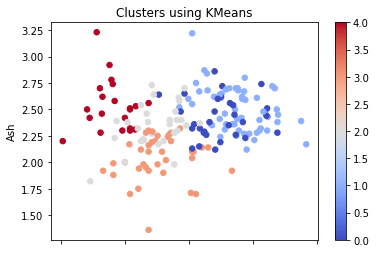

In [216]:
data_1.plot(x="Alcohol",y ="Ash",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

Text(0.5, 1.0, 'Clusters using KMeans')

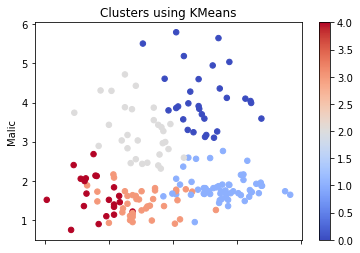

In [217]:
data_1.plot(x="Alcohol",y ="Malic",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

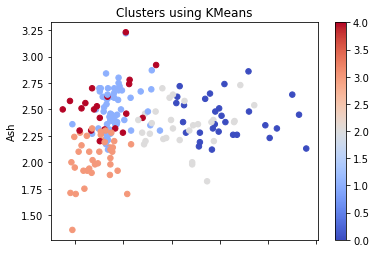

In [218]:
data_1.plot(x="Malic",y ="Ash",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [219]:
WCSS

[20.515791669694725,
 13.551289830722112,
 8.330507375945382,
 7.077552409491437,
 5.949912116946592,
 5.2309691235960445,
 4.708637821074581,
 4.296977492751038,
 3.919277440568562,
 3.642174707911483]